In [1]:
import augs
import numpy as np

augmentation = augs.MonoAug()

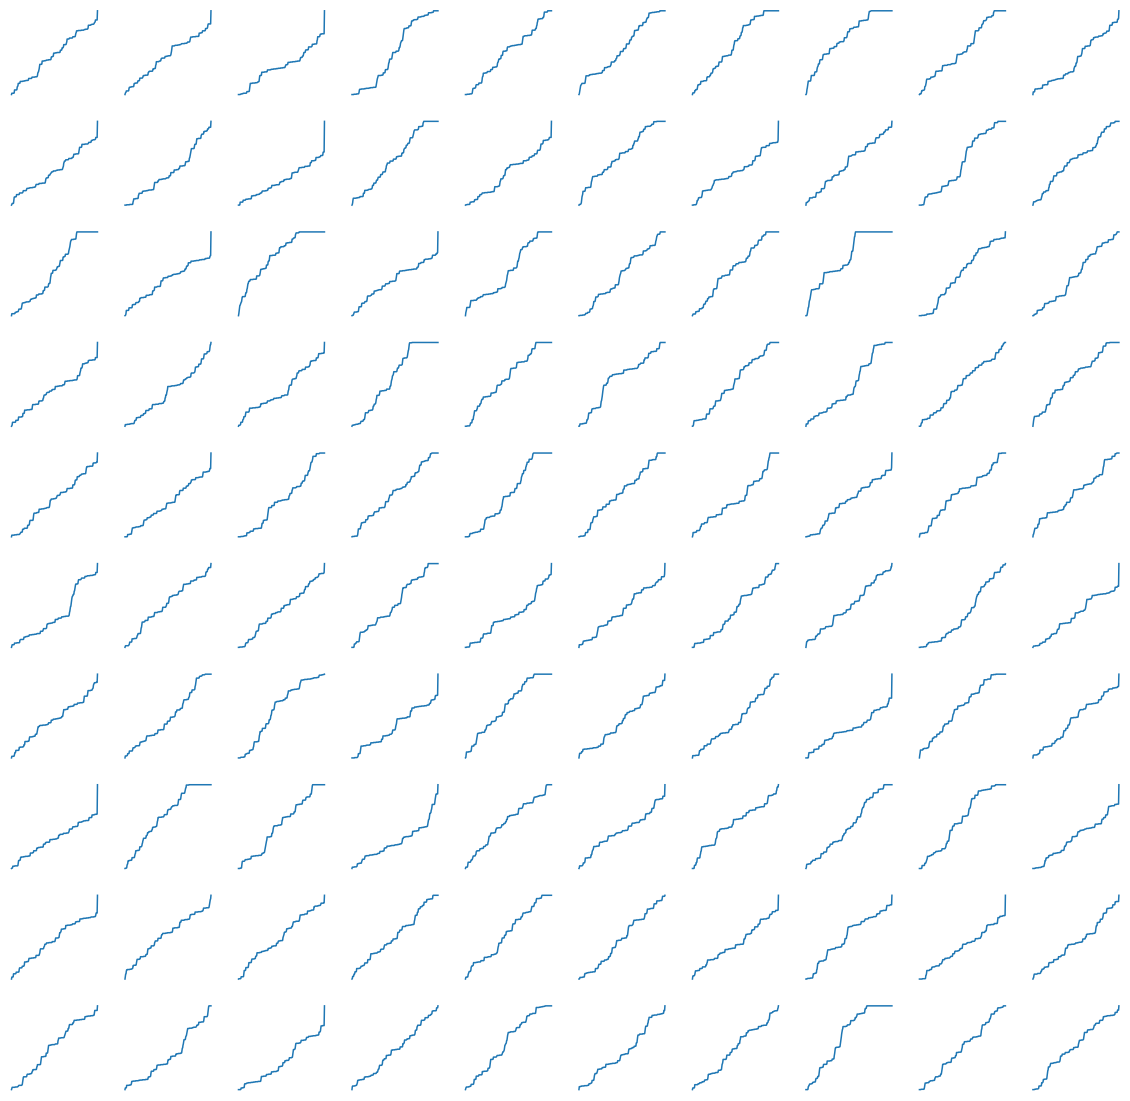

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(10, 10, figsize=[20,20])
for i in np.ravel(ax):
    mp = augmentation.wiggle_map(8)
    i.plot(np.arange(256), mp)
    i.axis('off')